# Project Description
---
Interconnect seeks to predict customer churn so that at risk clients can be offered promotional incentives and tailored service options. Multiple datasets covering 7,043 customers were merged and analyzed to engineer features and train a machine learning model for churn prediction. Model quality is assessed using AUC-ROC as the primary evaluation metric.

In [86]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [87]:
# Importing all CSV files
contract= pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

# Contract DF
---

In [88]:
# Lets begin with contract df first!
display(contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

In [89]:
# Lets start with contract df first
display(contract.head(10), contract.tail(10), contract.sample(10), contract.describe())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7033,9767-FFLEM,2016-12-01,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25
7034,0639-TSIQW,2014-03-01,2019-10-01 00:00:00,Month-to-month,Yes,Credit card (automatic),102.95,6886.25
7035,8456-QDAVC,2018-07-01,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1
7036,7750-EYXWZ,2019-02-01,No,One year,No,Electronic check,60.65,743.3
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6755,9003-CPATH,2016-08-01,No,Month-to-month,No,Electronic check,79.90,3313.4
1704,0107-YHINA,2019-10-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.75,99.75
6840,1724-IQWNM,2020-01-01,No,Month-to-month,Yes,Mailed check,19.30,19.3
949,6169-PPETC,2017-03-01,No,Two year,No,Bank transfer (automatic),20.50,759.35
999,3234-VKACU,2019-12-01,No,Month-to-month,No,Electronic check,70.30,132.4
4008,0743-HRVFF,2015-11-01,No,One year,Yes,Electronic check,56.15,2898.95
3006,9685-WKZGT,2018-11-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,74.95,1036.75
5731,4936-YPJNK,2019-04-01,No,Month-to-month,Yes,Mailed check,19.90,199.45
5274,6723-WSNTY,2014-08-01,No,One year,Yes,Credit card (automatic),108.10,7181.95
6748,6230-BSUXY,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,85.00,85


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


## **Contract DF: Observations and Planned Changes to be made**
---
### Current Status
* 7043 rows, 8 columns
* `BeginDate` is an object (string)
* `EndDate` contains a mix of `'No'` and date strings
* `MonthlyCharges` is a float, no issues here
* `TotalCharges` is an object (string)

### Planned Changes
1. [x] Convert `BeginDate` to a **datetime** data type.
2. [x] Handle `EndDate` separate into:
   - [x] A column with datetime values (actual end dates)
   - [x] A column indicating churn (`Yes`/`No`)
3. [x] Convert `TotalCharges` to a **float** data type to allow numeric calculations.


In [90]:
# Change BeginDate to datatime 
contract['BeginDate']= pd.to_datetime(contract['BeginDate'], errors='coerce')

# Checking basic info on column
missingv_begindate= (contract['BeginDate'].isna().sum())
print(f'There are {missingv_begindate} missing values in BeginDate Column')
print()
min_begin= contract['BeginDate'].min()
max_begin= contract['BeginDate'].max()
print(f'Earliest BeginDate: {min_begin}')
print(f'Latest BeginDate: {max_begin}')
print() 
# Looks good now!
display(contract.info())

There are 0 missing values in BeginDate Column

Earliest BeginDate: 2013-10-01 00:00:00
Latest BeginDate: 2020-02-01 00:00:00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


None

In [91]:
# Endtime column
contract['EndDate']= pd.to_datetime(contract['EndDate'], errors='coerce')

# Checking basic info on column
missingv_enddate= (contract['EndDate'].isna().sum())
print(f'There are {missingv_enddate} missing values in EndDate Column')
print()
min_end= contract['EndDate'].min()
max_end= contract['EndDate'].max()
print(f'Earliest EndDate: {min_end}')
print(f'Latest EndDate: {max_end}')
print() 
# Looks good now!
display(contract.info())

There are 5174 missing values in EndDate Column

Earliest EndDate: 2019-10-01 00:00:00
Latest EndDate: 2020-01-01 00:00:00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 440.3+ KB


None

In [92]:
# Churn column: Yes= if they left, No= if still active
contract['Churn'] = contract['EndDate'].apply(lambda x: 'Yes' if pd.notna(x) else 'No')

# Double Checking if column values are correct!
contract.info()
contract.sample(10)
# Looks good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   Churn             7043 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 495.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2870,1400-WIVLL,2015-05-01,NaT,Two year,No,Electronic check,107.95,5969.85,No
2214,8337-MSSXB,2018-09-01,2019-11-01,Month-to-month,Yes,Electronic check,86.30,1180.95,Yes
987,3717-OFRTN,2020-01-01,NaT,Month-to-month,No,Bank transfer (automatic),19.75,19.75,No
1277,4821-WQOYN,2014-02-01,NaT,Two year,Yes,Credit card (automatic),20.10,1326.25,No
5412,3733-UOCWF,2015-01-01,NaT,One year,Yes,Bank transfer (automatic),85.55,5251.75,No
2341,4304-TSPVK,2014-06-01,NaT,Two year,No,Bank transfer (automatic),114.90,7843.55,No
6705,3733-ZEECP,2018-04-01,NaT,Month-to-month,Yes,Electronic check,51.10,1232.9,No
263,7605-BDWDC,2017-07-01,NaT,Two year,Yes,Bank transfer (automatic),49.85,1520.1,No
4438,2263-SFSQZ,2015-11-01,NaT,Two year,Yes,Mailed check,24.95,1222.25,No
4475,4693-VWVBO,2019-11-01,NaT,Month-to-month,No,Electronic check,19.55,61.05,No


In [93]:
# Change TotalCharges column to numeric first
contract['TotalCharges']= pd.to_numeric(contract['TotalCharges'], errors='coerce')
missingv_totalcharges= contract['TotalCharges'].isna().sum()
print(f'There are {missingv_totalcharges} missing values in the TotalCharges column')
print()
display(contract[contract['TotalCharges'].isna()])

There are 11 missing values in the TotalCharges column



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,No


In [94]:
# Lets fill those missing values with 0
contract['TotalCharges']= contract['TotalCharges'].fillna(0)

### Handling Missing Values in `TotalCharges`

When we first looked at the `TotalCharges` column, it was stored as an object type. Trying to convert it straight to numeric didn't work because some cells had empty strings. To fix this, we used `pd.to_numeric()` with `errors='coerce'`, which turned any non-numeric values into `NaN`.

After that, we found **11 missing values** in `TotalCharges`.

Looking closer at these 11 records, we noticed:

* Their `BeginDate` is **2020-02-01**, the latest start date in the dataset.
* Their `EndDate` is `NaT`, meaning they’re still active.
* Their `Churn` is `"No"`, so they haven’t left.
* Their `MonthlyCharges` are all valid.

So basically, these are **brand new customers** who haven’t been billed yet, which is why `TotalCharges` is missing.

Since it makes sense that they haven’t been charged yet, we filled these missing values with `0`.  
This keeps the data accurate and lets us use `TotalCharges` for calculations and modeling without issues.


In [95]:
# Final Check on contract df!
display(contract.info(), contract.sample(10))

# Looks good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churn             7043 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 495.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
852,8713-IGZSO,2019-12-01,NaT,Month-to-month,No,Mailed check,24.85,62.00,No
6914,7142-HVGBG,2016-06-01,2020-01-01,Month-to-month,Yes,Electronic check,103.00,4414.30,Yes
6746,8976-OQHGT,2019-06-01,2019-10-01,Month-to-month,No,Mailed check,56.50,235.10,Yes
4799,4182-BGSIQ,2019-04-01,NaT,Month-to-month,Yes,Bank transfer (automatic),19.80,196.75,No
4642,5458-CQJTA,2014-08-01,2020-01-01,Two year,Yes,Bank transfer (automatic),74.80,4820.15,Yes
4556,3750-CKVKH,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,67.75,116.65,Yes
3428,8749-JMNKX,2015-08-01,2019-11-01,Month-to-month,Yes,Bank transfer (automatic),93.80,4750.95,Yes
65,5122-CYFXA,2019-11-01,NaT,Month-to-month,Yes,Electronic check,75.30,244.10,No
4637,9470-YFUYI,2014-03-01,NaT,One year,Yes,Bank transfer (automatic),71.00,5012.10,No
3659,0795-GMVQO,2014-07-01,NaT,One year,No,Credit card (automatic),109.90,7332.40,No


# Personal DF
---

In [96]:
# Print basic info and sample 
display(personal.info(),personal.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
5738,5049-GLYVG,Male,0,No,No
6585,4955-VCWBI,Female,0,Yes,Yes
1727,5136-RGMZO,Male,0,No,No
3402,4951-UKAAQ,Female,0,No,No
5130,4625-EWPTF,Male,0,No,No
4707,0961-ZWLVI,Male,0,No,Yes
1382,4538-WNTMJ,Female,0,Yes,Yes
5487,5519-TEEUH,Male,0,No,Yes
565,5846-NEQVZ,Male,0,Yes,Yes
6303,6308-CQRBU,Female,0,Yes,No


In [97]:
# Check Partner and Dependents columns
display(personal['Partner'].value_counts())
display(personal['Dependents'].value_counts())

# Check SeniorCitizen column
display(personal['SeniorCitizen'].value_counts())

# Check Gender column
display(personal['gender'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

In [98]:
# Rename for consistency
personal = personal.rename(columns={'gender': 'Gender'})

# Double check
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   Gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


# Internet DF
---

In [99]:
# Checking basic structure 
display(internet.info(), internet.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
3944,6094-ZIVKX,DSL,Yes,No,Yes,No,No,No
3196,5606-AMZBO,Fiber optic,Yes,No,No,No,No,No
4048,2080-CAZNM,Fiber optic,No,Yes,Yes,No,Yes,Yes
965,5494-HECPR,Fiber optic,No,No,No,No,Yes,No
2467,9909-DFRJA,Fiber optic,Yes,No,Yes,Yes,No,Yes
4496,1116-FRYVH,DSL,Yes,Yes,No,Yes,No,No
3545,1100-DDVRV,DSL,No,Yes,No,No,Yes,Yes
4229,4097-YODCF,Fiber optic,Yes,Yes,No,No,Yes,Yes
867,7029-RPUAV,Fiber optic,No,No,Yes,No,Yes,Yes
4550,9507-EXLTT,Fiber optic,No,No,No,No,Yes,No


In [100]:
# Checking internet(df) columns
display(internet['OnlineSecurity'].value_counts())
print()
display(internet['OnlineBackup'].value_counts())
print()
display(internet['DeviceProtection'].value_counts())
print()
display(internet['TechSupport'].value_counts())
print()
display(internet['StreamingTV'].value_counts())
print()
display(internet['StreamingMovies'].value_counts())
print()
display(internet['InternetService'].value_counts())

No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

No     3473
Yes    2044
Name: TechSupport, dtype: int64

No     2810
Yes    2707
Name: StreamingTV, dtype: int64

No     2785
Yes    2732
Name: StreamingMovies, dtype: int64

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

### Internet DataFrame Check

All service related columns (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`) contain clean "Yes"/"No" values, and the `InternetService` column has proper categories (`DSL`, `Fiber optic`).  

Key insight: Only 5,517 out of 7,043 customers have internet service, which makes sense as some customers only have phone service. Overall, the Internet DataFrame is clean and ready for analysis.

# Phone DF
---

In [101]:
# Finally, lets check phone Df
display(phone.info(), phone.sample(10), phone['MultipleLines'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
3151,9430-NKQLY,Yes
1192,6393-WRYZE,Yes
2811,8189-DUKMV,No
5710,0186-CAERR,Yes
5236,8679-LZBMD,No
2574,9170-GYZJC,Yes
4216,1269-FOYWN,No
3983,5868-YTYKS,No
5430,5271-DBYSJ,No
3304,3258-SYSWS,Yes


No     3390
Yes    2971
Name: MultipleLines, dtype: int64

### Phone DataFrame Check

The Phone DataFrame contains 6,361 entries with `customerID` and `MultipleLines` columns. Both columns are clean with no missing values and correct data types.  

Key insight: About 90% of customers have phone service, which is consistent with business expectations. The `MultipleLines` column contains only "Yes"/"No" values and is ready for analysis

In [102]:
# Now lets join our dfs
main= contract.copy()
main= main.merge(personal, on='customerID', how='left')
main= main.merge(internet, on='customerID', how='left')
main= main.merge(phone, on='customerID', how='left')

# Make a copy before any encoding for visuals
main_original = main.copy()

In [103]:
# Lets check our new 'Main' df and its missing values!
display(main.sample(5), main.info())
display(main.isna().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churn             7043 non-null   object        
 9   Gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
1786,7530-HDYDS,2016-10-01,2019-12-01,Month-to-month,Yes,Credit card (automatic),84.25,3264.50,Yes,Female,...,No,No,Fiber optic,No,Yes,Yes,Yes,No,No,No
6826,7976-CICYS,2019-10-01,NaT,Month-to-month,Yes,Credit card (automatic),20.70,83.75,No,Male,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
787,2202-OUTMO,2017-04-01,NaT,Month-to-month,Yes,Bank transfer (automatic),60.85,2003.60,No,Female,...,Yes,No,DSL,Yes,No,No,Yes,No,No,Yes
434,6048-NJXHX,2016-09-01,NaT,Two year,Yes,Electronic check,19.75,899.45,No,Male,...,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2583,6463-MVYRY,2015-05-01,NaT,Two year,No,Bank transfer (automatic),69.85,4003.00,No,Female,...,No,No,DSL,Yes,No,Yes,Yes,Yes,No,No


None

EndDate             5174
StreamingMovies     1526
StreamingTV         1526
TechSupport         1526
DeviceProtection    1526
OnlineBackup        1526
OnlineSecurity      1526
InternetService     1526
MultipleLines        682
Partner                0
Dependents             0
customerID             0
BeginDate              0
Gender                 0
Churn                  0
TotalCharges           0
MonthlyCharges         0
PaymentMethod          0
PaperlessBilling       0
Type                   0
SeniorCitizen          0
dtype: int64

## Data Integration Analysis
---

### Missing Values After Joining DataFrames

After merging all four DataFrames into a single dataset, several columns contain missing values. These missing values are expected and align with the underlying business logic.

### Internet Service Columns (1,526 missing values)
* The missing values correspond to customers who do not have internet service.
* Affected columns include:
  * OnlineSecurity  
  * OnlineBackup  
  * DeviceProtection  
  * TechSupport  
  * StreamingTV  
  * StreamingMovies  
* Since these services require an active internet connection, missing values in these columns are valid and do not indicate data quality issues.

### Phone Service Column (682 missing values)
* The missing values in the **MultipleLines** column represent customers who do not have phone service.
* Customers without phone service cannot have multiple phone lines, so these missing values are expected.

### Business Logic Validation
* Total customers: **`7,043`**
* 
* Customers with internet service: **`5,517 (78.3%)`**
* Customers with phone service: **`6,361 (90.3%)`**


These distributions are realistic for a telecom provider and confirm that the missing values result from differences in service subscriptions rather than data errors.


# Data Preprocessing
---

In [104]:
# Quick Check
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Churn             7043 non-null   object        
 9   Gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

In [105]:
# Transform Churn into numeric column!
print(f"Before Transforming value counts {main['Churn'].value_counts()}")
main['Churn'] = main['Churn'].map({'Yes': 1, 'No': 0})
print()
print(f"After Transforming value counts {main['Churn'].value_counts()}")
# ValueCounts checks out, we are good!

Before Transforming value counts No     5174
Yes    1869
Name: Churn, dtype: int64

After Transforming value counts 0    5174
1    1869
Name: Churn, dtype: int64


In [106]:
# Drop unnecessary columns
main= main.drop(columns=['customerID', 'BeginDate', 'EndDate'])

In [107]:
# Fill missing values for internet and phone columns
internet_columns= ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
main[internet_columns]= main[internet_columns].fillna('No Internet Service')
main['MultipleLines']= main['MultipleLines'].fillna('No Phone Service')

In [108]:
# Lets double check our new info
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   Churn             7043 non-null   int64  
 6   Gender            7043 non-null   object 
 7   SeniorCitizen     7043 non-null   int64  
 8   Partner           7043 non-null   object 
 9   Dependents        7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


In [109]:
# Binary mapping
yes_no_columns = ['PaperlessBilling', 'Gender', 'Partner', 'Dependents']
main[yes_no_columns] = main[yes_no_columns].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

# One hot encode columns
onehot_cols = ['Type', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 
               'StreamingTV', 'StreamingMovies', 'MultipleLines']

# Save original shape before encoding
original_shape = main.shape

# Apply one hot encoding (overwriting main)
main = pd.get_dummies(main, columns=onehot_cols, drop_first=True)

# Display results
print("Shape of original dataframe (before encoding):", original_shape)
print("Shape of dataframe after encoding:", main.shape)
print()
print("Columns in encoded dataframe:")
display(main.columns.tolist())
print()
print("Sample of encoded data:")
display(main.sample(10))

Shape of original dataframe (before encoding): (7043, 18)
Shape of dataframe after encoding: (7043, 29)

Columns in encoded dataframe:


['PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Type_One year',
 'Type_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'InternetService_Fiber optic',
 'InternetService_No Internet Service',
 'OnlineSecurity_No Internet Service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No Internet Service',
 'OnlineBackup_Yes',
 'DeviceProtection_No Internet Service',
 'DeviceProtection_Yes',
 'TechSupport_No Internet Service',
 'TechSupport_Yes',
 'StreamingTV_No Internet Service',
 'StreamingTV_Yes',
 'StreamingMovies_No Internet Service',
 'StreamingMovies_Yes',
 'MultipleLines_No Phone Service',
 'MultipleLines_Yes']


Sample of encoded data:


,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Gender,SeniorCitizen,Partner,Dependents,Type_One year,Type_Two year,...,DeviceProtection_No Internet Service,DeviceProtection_Yes,TechSupport_No Internet Service,TechSupport_Yes,StreamingTV_No Internet Service,StreamingTV_Yes,StreamingMovies_No Internet Service,StreamingMovies_Yes,MultipleLines_No Phone Service,MultipleLines_Yes
3034,0,84.50,84.50,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4089,1,74.75,706.60,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4722,1,70.15,4224.70,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
2073,0,19.90,283.75,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
1384,1,69.25,1554.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4375,1,114.30,7383.70,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
6337,0,100.90,5448.60,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,1,0,1
1081,1,98.85,4564.90,0,1,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
2978,1,85.95,2107.15,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5966,1,99.45,4138.05,1,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1


In [110]:
# Final Check
print("Missing values in encoded dataset:")
print(main.isnull().sum().sum())
display(main.info())

Missing values in encoded dataset:
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PaperlessBilling                       7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   Churn                                  7043 non-null   int64  
 4   Gender                                 7043 non-null   int64  
 5   SeniorCitizen                          7043 non-null   int64  
 6   Partner                                7043 non-null   int64  
 7   Dependents                             7043 non-null   int64  
 8   Type_One year                          7043 non-null   uint8  
 9   Type_Two year                          7043 non-null   uint8  
 10  PaymentMethod_Credit card (automati

None

# Visualizing Churn Patterns
---

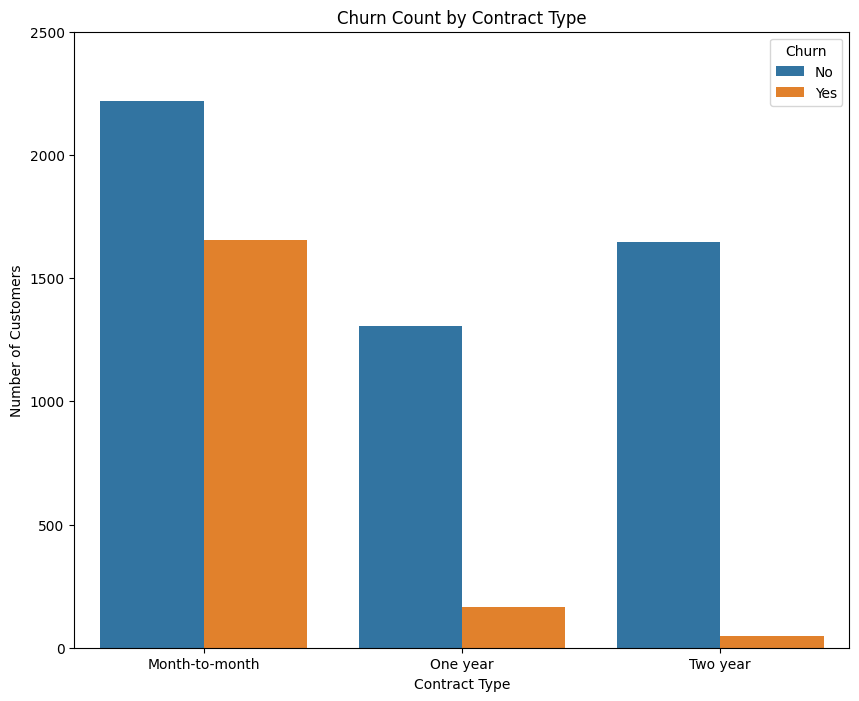

In [113]:
# Churn Count by Contract Type
plt.figure(figsize=(10,8))
sns.countplot(data=main_original, x='Type', hue='Churn')
plt.title('Churn Count by Contract Type')
plt.ylabel('Number of Customers')
plt.xlabel('Contract Type')
plt.legend(title='Churn', loc='upper right')
plt.ylim(0, 2500)
plt.show()

# Visualizing Churn Patterns Summary
---
## Churn Count by Contract Type
`(Answers: Where is churn happening the most?)`

A countplot was used to compare the number of customers who churned versus those who remained across different contract types. This visualization helps highlight how contract length relates to customer retention.

Customers on month-to-month contracts show the highest churn, with a large portion leaving compared to those who stay. This suggests that short-term contracts are more exploratory in nature, where customers may be trying the service and deciding not to continue. In contrast, one-year and two-year contracts exhibit significantly lower churn, with two-year contracts showing the strongest retention.
From a business perspective, this indicates that longer-term contracts are associated with greater customer loyalty, while month-to-month plans represent a higher churn risk and may require targeted retention strategies.

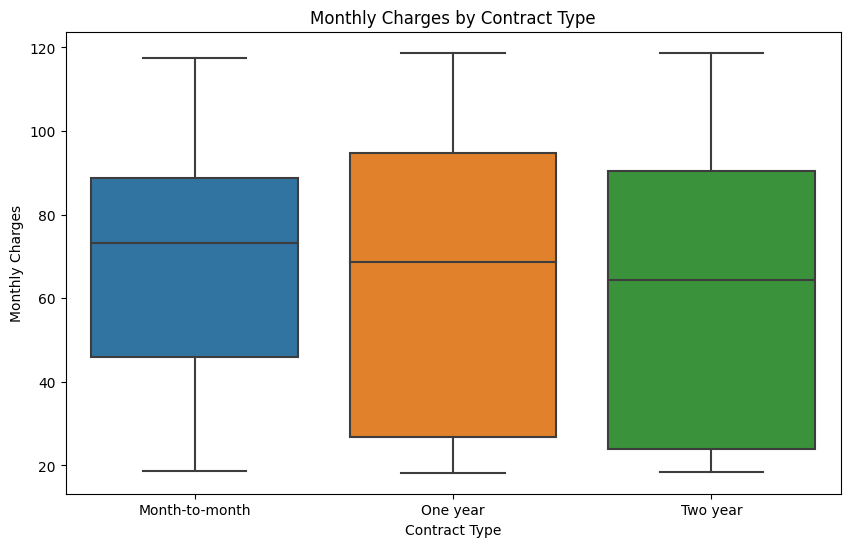

In [122]:
# Visualize Monthly Charges by Contract Type
plt.figure(figsize=(10,6))
sns.boxplot(data=main_original, x='Type', y='MonthlyCharges')
plt.title('Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')›
plt.show()

# Visualizing Churn Patterns Summary
---
## Monthly Charges by Contract Type
`(Answers: What’s different about month-to-month customers compared to others?)`

To better understand why churn is highest among month-to-month customers, monthly charges were compared across contract types using a boxplot. This visualization helps highlight differences in typical pricing and overall cost spread for each contract length.
Month-to-month customers have the highest median monthly charges, meaning they generally pay more on a recurring basis compared to customers on one-year or two-year contracts. Additionally, the minimum monthly charges for month-to-month plans are higher, suggesting fewer low-cost entry options for these customers.

While the maximum charges are fairly similar across all contract types, longer-term contracts tend to have lower typical monthly costs, likely due to pricing incentives tied to longer commitments. From a business perspective, this higher and less flexible pricing structure for month-to-month plans may help explain the higher churn rate, as customers face greater price pressure without the benefits of long-term discounts.

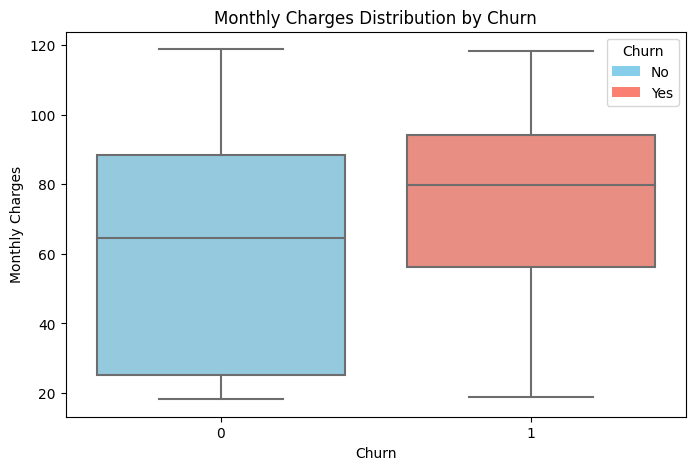

In [114]:
# Monthly Charges Distribution by Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=main, x='Churn', y='MonthlyCharges', palette=['skyblue','salmon'])
plt.title('Monthly Charges Distribution by Churn')
plt.ylabel('Monthly Charges')
plt.xlabel('Churn')

# Add a manual legend
legend_elements = [Patch(facecolor='skyblue', label='No'),
                   Patch(facecolor='salmon', label='Yes')]
plt.legend(handles=legend_elements, title='Churn', loc='upper right')

plt.show(

# Visualizing Churn Patterns Summary
---
## Monthly Charges Distribution by Churn
`(Answers: Across all customers, does price actually relate to churn?)`

This visualization was created to further examine whether monthly pricing is associated with customer churn. The distribution shows that customers who churn tend to have higher median monthly charges compared to customers who remain with the service. Additionally, churned customers exhibit a wider spread of higher charges, indicating greater pricing variability among those who leave.

From a business perspective, this suggests that higher monthly costs may increase churn risk, reinforcing earlier findings that month-to-month customers — who typically pay higher rates — are more likely to churn. This insight supports the inclusion of pricing-related features in the churn prediction model and highlights pricing as a potential lever for customer retention.

# Detailed Plan for Final Project
---

### 1. Perform Exploratory Data Analysis (EDA) and Clean Individual Datasets (Completed)

For each of the four datasets (`contract`, `personal`, `internet`, and `phone`), the following steps were performed:

* Reviewed dataset structure using `info()`, `head()`, `tail()`, `sample()`, and `describe()`
* Verified row counts, column types, and presence of missing values
* Checked value distributions using `value_counts()` for categorical variables
* Identified columns requiring data type conversion or cleaning

**Contract DataFrame**
* Converted `BeginDate` from object to datetime
* Split `EndDate` into:
  * A datetime column for actual end dates
  * A binary churn indicator
* Converted `TotalCharges` from object to numeric
* Investigated and handled 11 missing `TotalCharges` values caused by newly joined customers by filling with `0`

**Personal, Internet, and Phone DataFrames**
* Verified categorical values were valid and consistent
* Confirmed service related missing values were expected based on business logic
* Renamed columns where necessary for consistency
* No major data quality issues were found in these datasets

### 2. Merge All Datasets into a Single Modeling Table (Completed)

- Merged all four datasets using `customerID` as the primary key
- Used a **left join** strategy to preserve all customers from the contract dataset
- Verified merged dataset dimensions and confirmed expected row count (7,043 customers)
- Analyzed missing values post merge and validated they align with service subscriptions:
  - Internet related services missing for customers without internet
  - Phone related services missing for customers without phone service
- Confirmed distributions were realistic and consistent with telecom business logic

### 3. Prepare Target Variable and Finalize Feature Set (Completed)

* Created a binary target variable (`Churn`) where:
  - `1` indicates churned customers
  - `0` indicates active customers
* Dropped non informative or leakage prone columns:
  - `customerID`
  - `BeginDate`
  - `EndDate`
* Ensured the dataset only contains features available at prediction time

### 4. Encode Categorical Features and Prepare Data for Modeling (Completed)

* Applied binary mapping to yes/no variables:
  - `PaperlessBilling`, `Gender`, `Partner`, `Dependents`
* Used one-hot encoding for multi-category features:
  - Contract type, payment method, internet services, phone services
* Applied `drop_first=True` to reduce multicollinearity
* Verified dataset shape before and after encoding
* Confirmed all features are numeric and suitable for machine learning models

### 4b. Visual Analysis of Features

* Created a **copy of the main dataset** before extensive preprocessing/encoding to preserve original categorical labels for easier interpretation.
* Used this copy to generate visualizations, including:
  - **Box plots** for numeric features like `TotalCharges` by churn status
  - **Count plots** for categorical variables (`ContractType`, `PaymentMethod`, Internet/Phone services)
  - **Bar charts** to examine service adoption rates and churn correlations
* **Insights from the visuals:**
  - Month-to-month contracts show higher churn
  - Certain internet or phone services are associated with lower churn
  - Numeric features like `TotalCharges` increase with long-term contracts, consistent with business expectations
* These visualizations helped:
  - Validate business logic
  - Confirm preprocessing steps
  - Guide feature interpretation in modeling

### 5. Train Classification Models with Emphasis on Boosting Algorithms

* Split the dataset into training and validation sets using a stratified split to preserve churn distribution
* Train several classification models, with a primary focus on **boosting-based algorithms**, such as:
  - Gradient Boosting
  - LightGBM
  - XGBoost 
* Include Logistic Regression as a baseline model for comparison
* Boosting models are prioritized because they:
  - Handle non linear relationships well
  - Perform effectively on tabular business data
  - Are robust to feature interactions and mixed feature types
* Apply consistent preprocessing across all models to ensure fair performance comparison

### 6. Tune Hyperparameters and Evaluate Models Using Appropriate Metrics

* Perform hyperparameter tuning (ex: grid search or randomized search) to optimize model performance
* Optimize models primarily for **AUC-ROC**, as it measures the ability to distinguish churned vs non churned customers
* Use **Accuracy** as a secondary metric for interpretability
* Evaluate models on the validation set using:
  - AUC-ROC scores
  - Accuracy
  - ROC curves
  - Confusion matrices
* Compare model performance to identify strengths and weaknesses of each approach

### 7. Select Final Model and Analyze Results

* Select the model with the highest validation **AUC-ROC** score
* Analyze feature importance or model coefficients to understand key churn drivers
* Interpret results in the context of customer behavior and business impact
* Summarize final model performance and prepare findings for the solution report


# Clarifying Questions
---
Before building the churn model, here are some key points to clarify:

### Business Impact
* Which is worse for the business: predicting a customer will churn but they stay, or predicting they’ll stay but they actually churn?
* What actions will the company take if a customer is predicted to churn?
* Are some customers more important to retain (like high-value or long-term customers)?

### Timeline & Success
* How far in advance should churn predictions be made? (1 month, 3 months, etc.)
* What AUC-ROC or accuracy would make the model useful for decisions?

### Data Considerations
* How should missing values be handled in different columns?  
* Are there external factors that could affect churn we should consider?  